<a id='intro'></a>
# Проведение А/В-тестов для анализа гипотез по увеличению выручки интернет-магазина

## Задание и инструкция по выполнению проекта:

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

### Часть 1. Приоритизация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача:

    Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
 
### Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача:

Проанализируйте A/B-тест: 

    Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
    Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
    Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
    Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
    Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
    Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
    Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
    Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
    Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
    Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
    Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
    Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
    Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
    Примите решение по результатам теста и объясните его. Варианты решений: 
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

### Оформление: 

Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


### Описание данных

Данные для первой части
Файл /datasets/hypothesis.csv. Скачать датасет

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
Файл /datasets/orders.csv. Скачать датасет

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Изучение данных из файлов

[В начало](#intro)

In [1]:
# Импортируем библиотеки Питона:
import pandas as pd #
import numpy as np #
from datetime import date, datetime, timedelta #
from matplotlib import pyplot as plt #
%matplotlib inline
from matplotlib import gridspec as gridspec 
import seaborn as sns
import warnings #
from scipy import stats as st #

# Изменяем настройки отображения обработки кода в Пандасе, чтобы предупрежедения не выводились:
warnings.filterwarnings("ignore")

# Изменяем настройки отображения столбцов в Пандасе, чтобы выводились все столбцы:
pd.set_option('display.max_columns', None)

# Изменяем настройки отображения столбцов в Пандасе, чтобы выводились 200 символов в ячейке:
pd.options.display.max_colwidth = 200

Загружаем данные из таблиц датасетов. Оптимизируем данные для анализа. Проверяем, что тип данных в каждой колонке — правильный.

In [2]:
# Читаем файлы с исходными данными и преобразуем их в датафрем Питона:
#     указываем путь на локальном компьютере и, как альтернативу, в общедоступной папке в jupiter hub: 
try:
    hypothesis = pd.read_csv("Y:/Обучение цифровой профессии/Аналитик данных/02-03 Принятие решений в бизнесе/hypothesis.csv")
except:
    hypothesis = pd.read_csv("/datasets/hypothesis.csv")
try:
    orders = pd.read_csv("Y:/Обучение цифровой профессии/Аналитик данных/02-03 Принятие решений в бизнесе/orders.csv")
except:
    orders = pd.read_csv("/datasets/orders.csv")
try:
    visitors = pd.read_csv("Y:/Обучение цифровой профессии/Аналитик данных/02-03 Принятие решений в бизнесе/visitors.csv")
except:
    visitors = pd.read_csv("/datasets/visitors.csv")        
#     присваиваем имена исходным таблицам:
hypothesis.name = 'hypothesis'
orders.name = 'orders'
visitors.name = 'visitors'

df_names = [hypothesis, orders, visitors]

In [3]:
# Функция для изучения содержимого исходных датафреймов:
def get_df_info(df_names):
    for i_names in df_names:
        print("Первые и последние 5 строк датафрейма:", i_names.name)
        display(i_names)
        print("-----------------------------------------------------------------------------")
        print("Общая информация о датафрейме:", i_names.name)
        i_names.info()
        print("-----------------------------------------------------------------------------")
        print("Разброс значений, максимум, минимум, среднее и медиана в столбцах датафрейма:", i_names.name)
        display(i_names.describe())
        print("-----------------------------------------------------------------------------")
        print("Количество дубликатов в датафрейме:", i_names.name)
        print(i_names.duplicated().sum())
        print("=============================================================================")

In [4]:
# изучаем содержимое исходных датафреймов:
df_info = get_df_info(df_names)


Первые и последние 5 строк датафрейма: hypothesis


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


-----------------------------------------------------------------------------
Общая информация о датафрейме: hypothesis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
-----------------------------------------------------------------------------
Разброс значений, максимум, минимум, среднее и медиана в столбцах датафрейма: hypothesis


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


-----------------------------------------------------------------------------
Количество дубликатов в датафрейме: hypothesis
0
Первые и последние 5 строк датафрейма: orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


-----------------------------------------------------------------------------
Общая информация о датафрейме: orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
-----------------------------------------------------------------------------
Разброс значений, максимум, минимум, среднее и медиана в столбцах датафрейма: orders


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


-----------------------------------------------------------------------------
Количество дубликатов в датафрейме: orders
0
Первые и последние 5 строк датафрейма: visitors


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


-----------------------------------------------------------------------------
Общая информация о датафрейме: visitors
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
-----------------------------------------------------------------------------
Разброс значений, максимум, минимум, среднее и медиана в столбцах датафрейма: visitors


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


-----------------------------------------------------------------------------
Количество дубликатов в датафрейме: visitors
0


Исходные датафреймы представляют собой три таблицы (кол.-во строк х кол.-во столбцов): 
- таблица оценки реализации гипотез (df_hypothesis): 9 х 5;
- таблица заказов пользователей (df_orders): 1197 х 5;
- таблица пользователей с разбивкой по группам А/В-теста (df_visitors): 62 х 3.

В столбцах используются значения различных типов: строки и целые числа. Для ряда значений автоматически определенный тип неверен (столбцы с датами имеют неверный формат). Пропусков данных не обнаружено. Явных дубликатов в данных на текущем этапе не обнаружено.

Проведем предобработку данных.

Заменим названия столбцов (приведем их к нижнему регистру).
Переопределим типы данных для столбцов с датами.

In [5]:
# Переименовываем столбцы:
hypothesis.columns = [x.lower().replace(' ', '_') for x in hypothesis.columns.values]
orders.columns = ['order_id', 'user_id', 'date', 'revenue', 'group']

# Переопределяем типы данных (приводим данные о времени к формату datetime):
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%dT').dt.date
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%dT').dt.date

# Информация о датафремах после предобработки:
df_info = get_df_info(df_names)

Первые и последние 5 строк датафрейма: hypothesis


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


-----------------------------------------------------------------------------
Общая информация о датафрейме: hypothesis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
-----------------------------------------------------------------------------
Разброс значений, максимум, минимум, среднее и медиана в столбцах датафрейма: hypothesis


,reach,impact,confidence,efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


-----------------------------------------------------------------------------
Количество дубликатов в датафрейме: hypothesis
0
Первые и последние 5 строк датафрейма: orders


,order_id,user_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


-----------------------------------------------------------------------------
Общая информация о датафрейме: orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  1197 non-null   int64 
 1   user_id   1197 non-null   int64 
 2   date      1197 non-null   object
 3   revenue   1197 non-null   int64 
 4   group     1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
-----------------------------------------------------------------------------
Разброс значений, максимум, минимум, среднее и медиана в столбцах датафрейма: orders


,order_id,user_id,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


-----------------------------------------------------------------------------
Количество дубликатов в датафрейме: orders
0
Первые и последние 5 строк датафрейма: visitors


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


-----------------------------------------------------------------------------
Общая информация о датафрейме: visitors
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
-----------------------------------------------------------------------------
Разброс значений, максимум, минимум, среднее и медиана в столбцах датафрейма: visitors


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


-----------------------------------------------------------------------------
Количество дубликатов в датафрейме: visitors
0


Проведем дополнительные исследования данных в файлах orders и visitors - ответим на вопросы:<br>
1) сколько групп в А/В тесте;<br>
2) какой период проведения теста;<br>
3) какое количество пользователей в каждой группе;<br>
4) были ли пользователи, которые попали в каждую из групп теста.


In [6]:
print('1) Количество групп в А/В тесте по таблицам:')
print('     orders   -', len(np.unique(orders['group'])))
print('     visitors -', len(np.unique(visitors['group'])))

print('2) Период проведения А/В теста по таблицам:')
print('     orders   - с', min(orders['date']), 'по', max(orders['date']))
print('     visitors - с', min(orders['date']), 'по', max(orders['date']))

print('3) Количество уникальных пользователей в группах из таблицы orders:')
# создадим series с user_id для группы A
s_a = orders[orders['group'] == 'A']['user_id'].unique()
# создадим series с user_id для группы B
s_b = orders[orders['group'] == 'B']['user_id'].unique()
# создадим series с user_id, которые есть одновременно и вгруппе А и в группе B
s_a_and_b = list(set(s_a) & set(s_b))
#display(s_a_and_b)
print('     А        -', len(s_a))
print('     В        -', len(s_b))

print('4) Количество уникальных пользователей, которые попали в каждую из групп:')
print('               -', len(s_a_and_b))

1) Количество групп в А/В тесте по таблицам:
     orders   - 2
     visitors - 2
2) Период проведения А/В теста по таблицам:
     orders   - с 2019-08-01 по 2019-08-31
     visitors - с 2019-08-01 по 2019-08-31
3) Количество уникальных пользователей в группах из таблицы orders:
     А        - 503
     В        - 586
4) Количество уникальных пользователей, которые попали в каждую из групп:
               - 58


## Часть 1. Приоритизация гипотез

[В начало](#intro)

Применим **фреймворк ICE для приоритизации гипотез** и отсортируем гипотезы по убыванию приоритета.

In [7]:
hypothesis['ice'] = round(((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']), 2)
display(hypothesis[['hypothesis','ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Применим **фреймворк RICE для приоритизации гипотез** и отсортируем гипотезы по убыванию приоритета.

In [8]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis','rice']].sort_values(by='rice', ascending=False))


,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Отмечаем, что пятерка наиболее перспективных гипотез и для метода ICE и для метода RICE оказалась одинаковой: 0, 2, 6, 7, 8. При этом **внутри списков ICE и RICE приоритетность гипотез отличается**: 8, 0, 7, 6, 2 и 7, 2, 0, 6, 8 соответственно.

При наличии исходных данных об охвате пользователей (параметр reach), для определения приоритета проверки гипотез целесообразно пользоваться методом RICE, который в этом случае дает более точное распределение рангов приоритетности.

## Часть 2. Анализ A/B-теста

[В начало](#intro)

В нашем распоряжении имеются датафреймы orders и visitors, содержащие информацию
о заказах и посетителях интернет-магазина, полученные в рамках A/B-тестирования. Получим
новый датасет "cummulative_data", содержащий кумулятивные данные.

In [9]:
# Создаем массив уникальных пар значений дат и групп теста:
dates_groups = orders[['date','group']].drop_duplicates() 

# Получаем агрегированные кумулятивные по дням данные о заказах:
#  1) Получаем строки таблицы orders, дата которых меньше или равна дате элемента из dates_groups, 
#     а группа теста равна группе из dates_groups:
#         orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
#  2) Агрегируем значения. Вычисляем максимальную дату. Для группы тоже рассчитаем максимум, 
#     и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. 
#     Находим число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:
#         .agg({'date' : 'max', 'group' : 'max', 'order_id' : 'nunique', 'user_id' : 'nunique', 'revenue' : 'sum'}).
#     Применяем методы к каждой строке датафрейма: apply(axis=1) и сортируем результаты 
#     по столбцам 'date' и 'group'. 
orders_aggregated = (
    dates_groups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
           .agg({'date' : 'max', 'group' : 'max', 'order_id': pd.Series.nunique, 'user_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitors_aggregated = (
    dates_groups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
           .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия:
cumulative_data = (
    orders_aggregated
    .merge(visitors_aggregated, left_on=['date', 'group'],right_on=['date', 'group'])
)
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulative_data)
#cumulative_data.info()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


### График кумулятивной выручки по группам

[В начало](#intro)

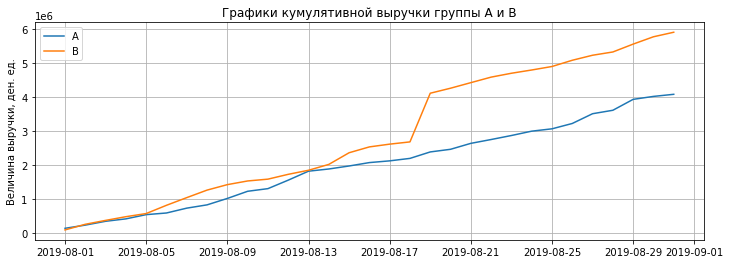

In [10]:
# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А:
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date','revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B:
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date','revenue', 'orders']]

# Строим графики кумулятивной выручки группы A и B:
fig, ax = plt.subplots(figsize = (12, 4)) 
ax.set_title('Графики кумулятивной выручки группы А и В')
ax.set_ylabel('Величина выручки, ден. ед.')
ax.grid()
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.legend()
plt.show()

Выручка почти равномерно увеличивается примерно до середины теста, что хорошо.<br>
При этом между 17 и 21 августа график выручки группы В резко возрастает и далее растет в том же темпе, что и по группе А, но примерно с одинаковым превышением относительно роста выручки по группе А. <br>
Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### График кумулятивного среднего чека по группам

[В начало](#intro)

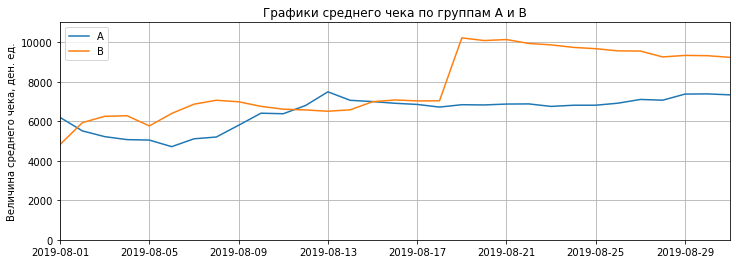

In [11]:
# Построим графики среднего чека по группам — для этого
# разделим кумулятивную выручку на кумулятивное число заказов:
fig, ax = plt.subplots(figsize = (12, 4)) 
ax.set_title('Графики среднего чека по группам А и В')
ax.set_ylabel('Величина среднего чека, ден. ед.')
ax.grid()
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], label='B')
plt.axis([datetime(2019, 8, 1), datetime(2019, 8, 31), 0, 11000]) # задаем пределы по осям
plt.legend()
plt.show()

Средний чек имеет динамику к стабилизации к концу теста.<br>
После скачка в середине теста для группы В наблюдается постепенное падение и стабилизация к концу теста; для группы А наблюдается постепенный рост и стабилизация к концу теста.<br>
В конце теста средний чек группы В выше чека группы А примерно на 2000 ден.ед. (А ~ 7200; B ~ 9200). Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### График относительного изменения кумулятивного среднего чека группы B к группе A

[В начало](#intro)

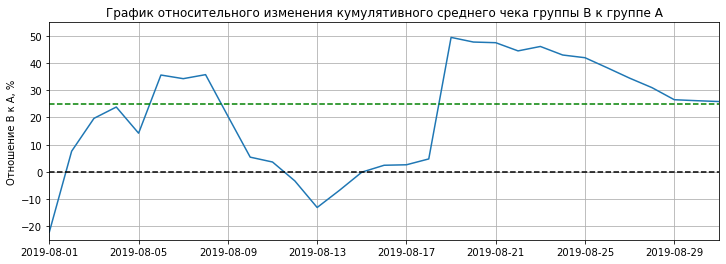

In [12]:
# Собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date',
right_on='date', how='left', suffixes=['A', 'B'])
merged_cumulative_revenue.columns = ['date', 'revenue_a', 'orders_a', 'revenue_b', 'orders_b']
#display(merged_cumulative_revenue)

# Строим отношение средних чеков
fig, ax = plt.subplots(figsize = (12, 4)) 
ax.set_title('График относительного изменения кумулятивного среднего чека группы B к группе A')
ax.set_ylabel('Отношение В к А, %')
ax.grid()
plt.plot(merged_cumulative_revenue['date'], 100 * (((merged_cumulative_revenue['revenue_b'] / merged_cumulative_revenue['orders_b']) / (merged_cumulative_revenue['revenue_a'] / merged_cumulative_revenue['orders_a'])) - 1))
plt.axis([datetime(2019, 8, 1), datetime(2019, 8, 31), -25, 55]) # задаем пределы по осям
plt.axhline(y=0, color='black', linestyle='--') # добавляем ось X
plt.axhline(y=25, color='green', linestyle='--') # добавляем ось X (вспомогательную)
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Это явно свидетельствует о наличии крупных заказов (выбросов). При этом отмечаем, что всю вторую половину времени тестирования, средний чек группы В лучше, чем группы А: примерно с 15.08.2019г. прирост среднего чека группы В фиксируется около 25% (или лучше) относительно группы А.

### Графики кумулятивной конверсии по группам А и В

[В начало](#intro)

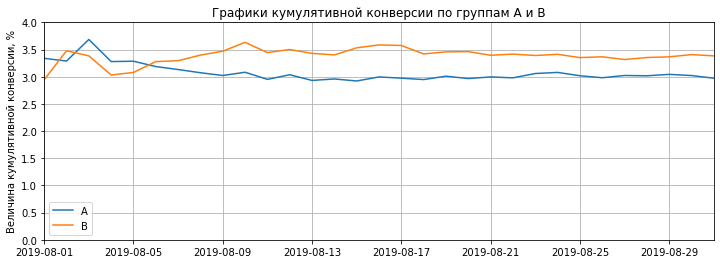

In [13]:
# Считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

# Отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
#display(cumulative_data_a)

# Отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']
#display(cumulative_data_b)

# Строим графики
fig, ax = plt.subplots(figsize = (12, 4)) 
ax.set_title('Графики кумулятивной конверсии по группам А и В')
ax.set_ylabel('Величина кумулятивной конверсии, %')
ax.grid()
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'] * 100, label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'] * 100, label='B')
plt.axis([datetime(2019, 8, 1), datetime(2019, 8, 31), 0, 4]) # задаем пределы по осям
plt.legend()
plt.show()

Примерно с 06.08.2019г. график становится симметричным. Конверсии групп колебались, но затем конверсия группы В вырвалась вперёд и зафиксировалась в районе 3,4 %, а конверсия группы А просела и также зафиксировалась в районе 3,0 %.

### Графики относительного изменения кумулятивной конверсии группы B к группе A

[В начало](#intro)

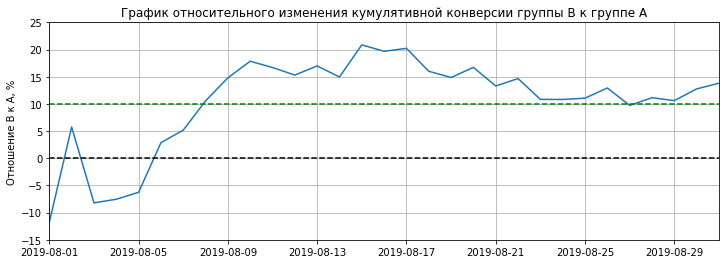

In [14]:
# Собираем данные в одном датафрейме
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], 
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
merged_cumulative_conversions.columns = ['date', 'conversion_a', 'conversion_b']
#display(merged_cumulative_conversions)

# Строим отношение кумулятивных конверсий
fig, ax = plt.subplots(figsize = (12, 4)) 
ax.set_title('График относительного изменения кумулятивной конверсии группы B к группе A')
ax.set_ylabel('Отношение В к А, %')
ax.grid()
plt.plot(merged_cumulative_conversions['date'], 100 * (merged_cumulative_conversions['conversion_b'] / merged_cumulative_conversions['conversion_a'] - 1))
plt.axis([datetime(2019, 8, 1), datetime(2019, 8, 31), -15, 25]) # задаем пределы по осям
plt.axhline(y = 0, color = 'black', linestyle = '--') # добавляем ось X
plt.axhline(y = 10, color ='green', linestyle = '--') # добавляем ось X (вспомогательную)
plt.show()

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но примерно с 29.08.2019г. постепенно растёт. Начиная примерно с 09.08.2019г. конверсия группы В фиксируется около прироста 10% (или лучше) относительно конверсии группы А.<br>
В целом отношение конверсии практически установилось, однако стоит проанализировать аномалии, поскольку они, возможно, изменят картину.

### Точечный график количества заказов по пользователям (график конверсии)

[В начало](#intro)

Помимо среднего чека, анализируют и конверсию. В рассматриваемом контексте конверсия равна отношению числа заказов к количеству посетителей сайта за время теста.<br> 
Пользователи, совершившие много заказов, влияют на числитель формулы конверсии. Скорее всего, их поведение отличается от нормального. Если речь не идёт об интернет-магазине с регулярным спросом, то, как правило, «обычный» пользователь совершает не больше двух заказов за короткий срок.<br> 
Построим график для конверсии.

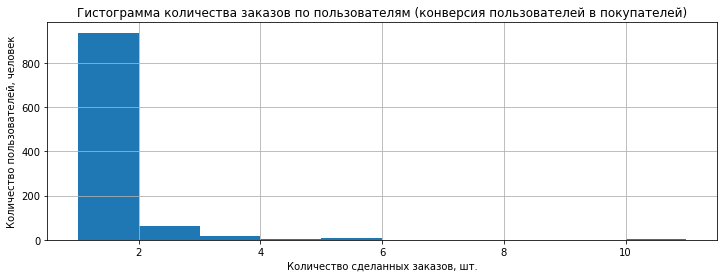

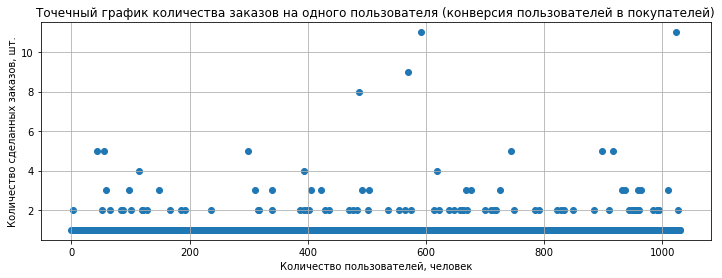

In [15]:
# Подсчитаем количество заказов по пользователям (конверсию):
orders_by_users = (orders
                   .groupby('user_id', as_index=False)
                   .agg({'order_id': 'nunique'})
                  )
orders_by_users.columns = ['user_id', 'orders']
#display(orders_by_users.sort_values(by='orders', ascending=False))

# Строим гистограмму количества заказов по пользователям (конверсию)
fig, ax = plt.subplots(figsize = (12, 4)) 
ax.set_title('Гистограмма количества заказов по пользователям (конверсия пользователей в покупателей)')
ax.set_xlabel('Количество сделанных заказов, шт.')
ax.set_ylabel('Количество пользователей, человек')
ax.grid()
plt.hist(orders_by_users['orders'], bins = 10) 
plt.show()

# Количество уникальных пользователей из таблицы orders_by_users
x_values = pd.Series(range(0, len(orders_by_users)))

# Строим точечную диаграмму числа заказов на одного пользователя
fig, ax = plt.subplots(figsize = (12, 4)) 
ax.set_title('Точечный график количества заказов на одного пользователя (конверсия пользователей в покупателей)')
ax.set_xlabel('Количество пользователей, человек')
ax.set_ylabel('Количество сделанных заказов, шт.')
ax.grid()
plt.scatter(x_values, orders_by_users['orders']) 
plt.show()


Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна, а также есть пользователи, сделавшие более 4 заказов (например, 11 заказов).<br>
Точная доля пользователей с заказами более 4 не ясна — пока непонятно, считать их аномалиями или нет.

### 95-й и 99-й перцентили количества заказов на пользователя

[В начало](#intro)

Посчитаем 90-й, 95-й и 99-й перцентили количества заказов на одно пользователя и выберем границу для определения аномальных пользователей.

In [16]:
# Определим 90, 95 и 99 перцентили количества заказов на одного пользователя:
print(np.percentile(orders_by_users['orders'], [90, 95, 99]))

[1. 2. 4.]


Анализируя значения 90-го, 95-го и 99-го перцентиля количества заказов на одного пользователя, заключаем, что не более 10% пользователей сделали 2 и больше заказов, **не более 5% пользователей сделали более 2 заказов** и не более 1% - сделали 4 и более заказов.<br>

Установим границу для определения числа аномальных пользователей как пользователь, который совершил более 2 заказов (так мы "жертвуем" 5% пользователей, но очищаем данные от выбросов). 

### Точечный график стоимостей заказов

[В начало](#intro)

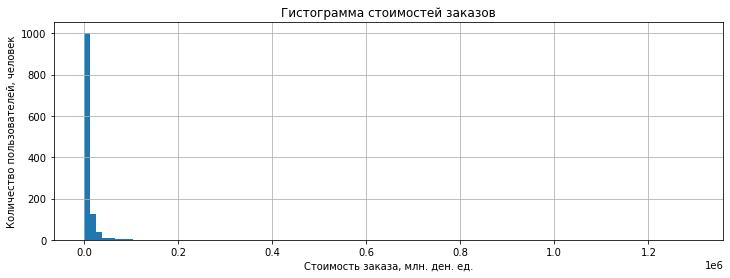

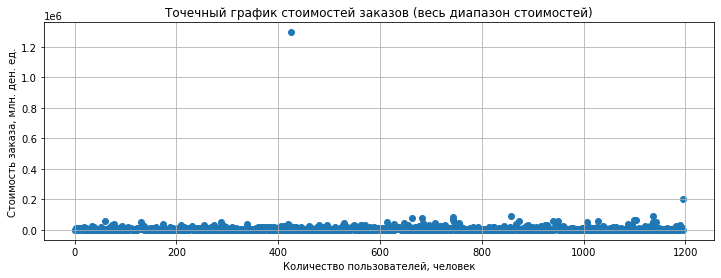

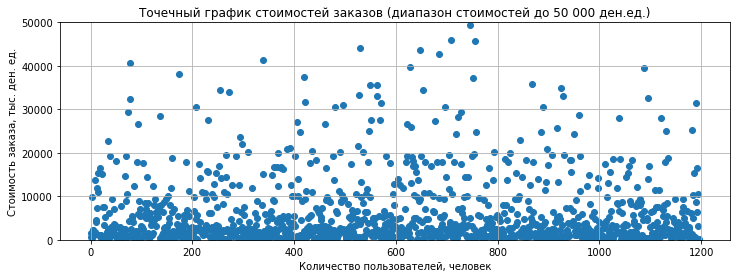

In [17]:
# Строим гистограмму стоимостей заказов
fig, ax = plt.subplots(figsize = (12, 4)) 
ax.set_title('Гистограмма стоимостей заказов')
ax.set_xlabel('Стоимость заказа, млн. ден. ед.')
ax.set_ylabel('Количество пользователей, человек')
ax.grid()
plt.hist(orders['revenue'], bins = 100) 
plt.show()

# Количество значений заказов из таблицы orders (количество пользователей, сделавших заказы)
x_values = pd.Series(range(0, len(orders['revenue'])))

# Строим график стоимостей заказов по пользователям для всего диапазона стоимостей
fig, ax = plt.subplots(figsize = (12, 4)) 
ax.set_title('Точечный график стоимостей заказов (весь диапазон стоимостей)')
ax.set_xlabel('Количество пользователей, человек')
ax.set_ylabel('Стоимость заказа, млн. ден. ед.')
ax.grid()
plt.scatter(x_values, orders['revenue']) 
plt.show()

# Строим график стоимостей заказов по пользователям с ограничением по стоимости
fig, ax = plt.subplots(figsize = (12, 4)) 
ax.set_title('Точечный график стоимостей заказов (диапазон стоимостей до 50 000 ден.ед.)')
ax.set_xlabel('Количество пользователей, человек')
ax.set_ylabel('Стоимость заказа, тыс. ден. ед.')
plt.ylim((0, 50000)) # задаем пределы по оси y от 0 до 50 000 ден.ед.
ax.grid()
plt.scatter(x_values, orders['revenue']) 
plt.show()

Большинство заказов стоят дешевле 30 тыс. ден.ед. Однако встречаются более дорогие и очень дорогие заказы (например, дороже 1,2 млн. ден.ед.).<br>

### 95-й и 99-й перцентили стоимости заказов

[В начало](#intro)

Посчитаем 90-й, 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов.

In [18]:
# Определим 90, 95 и 99 перцентили среднего чека в выборке:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Анализируя значения 90-го, 95-го и 99-го перцентиля стоимости заказов, заключаем, что не более 10% заказов стоят дороже 18 168,00 ден.ед., **не более 5% заказов дороже - 28 000,00 ден.ед.** и не более 1% дороже 58 233,20 ден.ед.<br>

Установим границу для определения аномальных заказов как заказ, стоимость которого превышает 28 000,00 ден.ед. (так мы "жертвуем" 5% заказов, но очищаем данные от выбросов). 

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным

[В начало](#intro)

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.<br>

**Проверка гипотез**<br>

**Формулируем нулевую гипотезу H₀:**<br>
**Различий в среднем количестве заказов между группами нет.**<br>

**Формулируем альтернативную гипотезу H₁:**<br>
**Различия в среднем количестве заказов между группами есть.**

Фактически мы проверяем гипотезу о равенстве средних двух генеральных совокупностей.
    
**Устанавливаем уровень значимости alfa = 0.05** (пороговый уровень статистической значимости alfa или ошибка первого рода, то есть вероятность ошибочно отклонить нулевую гипотезу составляет 5 из 100).

In [19]:
# Собираем датафрем data для подсчета статистики со следующими столбцами:
# date — дата;
# orders_per_date_a — количество заказов в выбранную дату в группе A;
# revenue_per_date_a — суммарная выручка в выбранную дату в группе A;
# orders_per_date_b — количество заказов в выбранную дату в группе B;
# revenue_per_date_b — суммарная выручка в выбранную дату в группе B;
# orders_cumulative_a — суммарное число заказов до выбранной даты включительно в группе A;
# revenue_cumulative_a — суммарная выручка до выбранной даты включительно в группе A;
# orders_cumulative_b — суммарное количество заказов до выбранной даты включительно в группе B;
# revenue_cumulative_b — суммарная выручка до выбранной даты включительно в группе B;
# visitors_per_date_a — количество пользователей в выбранную дату в группе A;
# visitors_per_date_b — количество пользователей в выбранную дату в группе B;
# visitors_cumulative_a — количество пользователей до выбранной даты включительно в группе A;
# visitors_cumulative_b — количество пользователей до выбранной даты включительно в группе B.

# 1) готовим таблицы по пользователям - группируем visitors по группам А и В:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]

visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cumulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']]
    .agg({'date': 'max', 'visitors_per_date_a': 'sum'}),
    axis=1
)

visitors_a_cumulative.columns = ['date', 'visitors_cumulative_a']


visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]

visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cumulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']]
    .agg({'date': 'max', 'visitors_per_date_b': 'sum'}),
    axis=1
)

visitors_b_cumulative.columns = ['date', 'visitors_cumulative_b']

# 2) готовим таблицы по заказам - группируем orders по группам А и В:
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)

orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cumulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']]
    .agg({'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}),
    axis=1).sort_values(by=['date'])

orders_a_cumulative.columns = ['date', 'orders_cumulative_a', 'revenue_cumulative_a']


orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)

orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cumulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']]
    .agg({'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}),
    axis=1).sort_values(by=['date'])

orders_b_cumulative.columns = ['date', 'orders_cumulative_b', 'revenue_cumulative_b']

# 3) собираем датафрем для подсчета статистики из подготовленных таблиц
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cumulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cumulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cumulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cumulative, left_on='date', right_on='date', how='left')
)
print('Обобщенная таблица для каждой из групп А и Б \nсо значениями количества заказов, объема выручки и количества покупателей \n(значения по дням и кумулятивные значения)')
display(data)

Обобщенная таблица для каждой из групп А и Б 
со значениями количества заказов, объема выручки и количества покупателей 
(значения по дням и кумулятивные значения)


,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cumulative_a,revenue_cumulative_a,orders_cumulative_b,revenue_cumulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cumulative_a,visitors_cumulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277


In [20]:
# Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

# Создадим переменные orders_by_users_a и orders_by_users_b со столбцами ['user_id', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['user_id', 'orders'] 

# Объявим переменные sample_a и sample_b, в которых пользователям из разных групп
# будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули.
# Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

# Переменная sample_a должна состоять из двух частей:
# 1. Список с количеством заказов для каждого из пользователей: orders_by_users_a['orders'].
# 2. Нули для пользователей, которые ничего не заказывали. Их количество равно 
#    разнице между суммой посетителей и количеством записей о заказах:
#    data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders']). 
#    Создадим объект pd.Series нужной длины в котором все значения равны нулю:
#    pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')

# Объединим последовательности функцией pd.concat() (от англ. concatenate, «сцеплять»). 
# Сперва в pd.concat() передаем то, что объединяют — в нашем случае список из первой и второй части:
# [orders_by_users_a['orders'], pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')]
# Далее передадим аргумент, сообщающий, что объекты Series нужно объединить по строкам (то есть записать подряд): 
# pd.concat([...], axis=0)

# Другими словами, в sample_a сохраним выборку, где каждый элемент — это число заказов
# определённого пользователя, в том числе ноль. Значит, число элементов sample_a
# — это количество пользователей, а сумма всех элементов — количество заказов.

# Получаем для переменной sample_a:
sample_a = (
    pd.concat(
    [
        orders_by_users_a['orders'], 
        pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')
    ],
    axis=0
    )
           )
#display(sample_a)

# Аналогично получаем для переменной sample_b:
sample_b = (
    pd.concat(
    [
        orders_by_users_b['orders'], 
        pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')
    ],
    axis=0
    )
           )
#display(sample_b)


# Устанавливаем уровень статистической значимости
# (если p-value окажется меньше него - отвергнем гипотезу):
alpha = .05

# Находим p-значение, то есть вероятность получить наблюдаемый или еще более далекий
# от предполагаемого результат при условии, что нулевая гипотеза верна. 
# Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой:
p_value = st.mannwhitneyu(sample_a, sample_b)[1]
print("Значение p-value, рассчитанное посредством критерия Манна-Уитни:", "{0:.3f}".format(p_value))
print('Уровень статистической значимости:', alpha)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()  
    
# Выведем относительный прирост среднего числа заказов группы B: 
# (среднее число заказов группы B / среднее число заказов группы A) - 1
# и округлим результат до трёх знаков после запятой (отобразим результат в процентах):
relative_growth_b = ((sample_b.mean() / sample_a.mean()) - 1) * 100
print("Относительный прирост среднего числа заказов группы B:", "{0:.3f}".format(relative_growth_b), "%")

Значение p-value, рассчитанное посредством критерия Манна-Уитни: 0.017
Уровень статистической значимости: 0.05
Отвергаем нулевую гипотезу

Относительный прирост среднего числа заказов группы B: 13.808 %


По «сырым» данным обнаружены различия в среднем числе заказов групп A и B. 
Значение p-value = 0,017 меньше уровеня статистической значимости alfa = 0,05. Значит, нулевая гипотеза о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергается: различия в среднем заказе все-таки есть.<br>

При этом относительный выигрыш группы B в приросте среднего числа заказов равен 13,808 %.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

[В начало](#intro)

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным — без удаления аномальных пользователей.<br>

**Проверка гипотез**<br>

**Формулируем нулевую гипотезу H₀:**<br>
**Различий в среднем чеке заказа между группами нет.**<br>

**Формулируем альтернативную гипотезу H₁:**<br>
**Различия в чеке заказа между группами есть.**

Вновь мы проверяем гипотезу о равенстве средних двух генеральных совокупностей.
    
**Устанавливаем уровень значимости alfa = 0.05** (пороговый уровень статистической значимости alfa или ошибка первого рода, то есть вероятность ошибочно отклонить нулевую гипотезу составляет 5 из 100).

In [21]:
# Передадим критерию mannwhitneyu() данные о выручке с заказов.

# Устанавливаем уровень статистической значимости
# (если p-value окажется меньше него - отвергнем гипотезу):
alpha = .05

# Находим p-значение, то есть вероятность получить наблюдаемый или еще более далекий
# от предполагаемого результат при условии, что нулевая гипотеза верна. 
# Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой:
p_value = st.mannwhitneyu(
    orders[orders['group'] == 'A']['revenue'], 
    orders[orders['group'] == 'B']['revenue']
)[1]
print("Значение p-value, рассчитанное посредством критерия Манна-Уитни:", "{0:.3f}".format(p_value))
print('Уровень статистической значимости:', alpha)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()  
    
# Найдём относительные различия в среднем чеке между группами: 
# и округлим результат до трёх знаков после запятой (отобразим результат в процентах):
relative_growth_b_orders = ((orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean()) - 1) * 100
print("Относительный прирост среднего чека группы B:", "{0:.3f}".format(relative_growth_b_orders), "%")

Значение p-value, рассчитанное посредством критерия Манна-Уитни: 0.729
Уровень статистической значимости: 0.05
Не получилось отвергнуть нулевую гипотезу

Относительный прирост среднего чека группы B: 25.871 %


Значение р-value = 0,729, что значительно больше принятого уровня статистической значимости alfa = 0,05. Значит, нет причин отвергать нулевую гипотезу, т.е. нет оснований считать, что средние чеки по группам А и В отличаются.<br>

При этом следует отметить, что фактически из данных теста средний чек группы B значительно выше (более чем на 25 %) среднего чека группы A.

### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным

[В начало](#intro)

**Выбранные критерии очистки данных**

В п.4.7. исследования был определен критерий для **исключения "аномальных" пользователей**, а именно:
для очистки исходных данных от выбросов решено исключить из анализа тех пользователей, **которые совершили более 2 заказов.**

В п.4.9. исследования был определен критерий для **исключения "аномальных" заказов**, а именно:
для очистки исходных данных от выбросов решено исключить из анализа те заказы, **стоимость которых превышает 28 000,00 ден.ед.**

In [22]:
# Устанавливаем лимиты по выбранным критериям очистки данных:
# (вместо жесткого присваивания переменным значений "2 заказа" и "28 тыс. ден.ед."
# используем значения 95 перцентилей, преобразованные в целые числа)
limit_orders = int(np.percentile(orders_by_users['orders'], [95]))
limit_revenue = int(np.percentile(orders['revenue'], [95]))
#print(limit_orders)
#print(limit_revenue)

**Проверка гипотез**<br>

**Формулируем нулевую гипотезу H₀:**<br>
**Различий в среднем количестве заказов между группами нет.**<br>

**Формулируем альтернативную гипотезу H₁:**<br>
**Различия в среднем количестве заказов между группами есть.**

Фактически мы проверяем гипотезу о равенстве средних двух генеральных совокупностей.
    
**Устанавливаем уровень значимости alfa = 0.05** (пороговый уровень статистической значимости alfa или ошибка первого рода, то есть вероятность ошибочно отклонить нулевую гипотезу составляет 5 из 100).

In [23]:
# Подготовим очищенные данные.

# 1) cделаем срезы пользователей с числом заказов больше 2 (users_with_many_orders) 
#    и пользователей, совершивших заказы дороже 28 000,00 ден.ед. (users_with_expensive_orders). 
# 2) объединим срезы в таблице abnormal_users. 
# 3) на основе полученной таблицы рассчитаем интересующие нас статистические показатели.
#    (сколько всего аномальных пользователей узнаем атрибутом shape).

# Выбросы по количеству заказов:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > limit_orders]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > limit_orders]['user_id'],
    ],
    axis=0,
)

# Выбросы по стоимости заказа:
users_with_expensive_orders = orders[orders['revenue'] > limit_revenue]['user_id']

# Выбросы по количеству заказов и по стоимости заказа:
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

#display(abnormal_users.head(5))

var_users_df = orders['user_id'].unique()
var_users_all = var_users_df.shape[0]
var_uers_abnormal = abnormal_users.shape[0]

print("Всего в исходном датафрейме было", var_users_all, "уникальных пользователя(ей) (или 100 %).")
print("При очистке данных к выбросам было отнесено", var_uers_abnormal, "пользователя(ей), совершивших \nлибо очень много заказов, либо заказ на очень большую сумму.") 
print("Таким образом в очищенных данных осталось", 100 - round(((var_uers_abnormal / var_users_all) * 100), 2), "% пользователя(ей).")


# Очищенные данные (выборки) количества заказов по пользователям по группам теста
# (применим фильтр по количеству заказов)
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))]['orders'],
        pd.Series(0, 
                  index = np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])),
                  name = 'orders'
                 ),
    ],
    axis = 0
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))]['orders'],
        pd.Series(0, 
                  index = np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])),
                  name = 'orders'
                 ),
    ],
    axis = 0
)

Всего в исходном датафрейме было 1031 уникальных пользователя(ей) (или 100 %).
При очистке данных к выбросам было отнесено 74 пользователя(ей), совершивших 
либо очень много заказов, либо заказ на очень большую сумму.
Таким образом в очищенных данных осталось 92.82 % пользователя(ей).


In [24]:
# Узнаем, как выбросы повлияли на результаты теста. 

# Посчитаем статистическую значимость различий в среднем количестве заказов 
# между группами теста по очищенным данным. 

# Применим статистический критерий Манна-Уитни к полученным выборкам:

# Устанавливаем уровень статистической значимости
# (если p-value окажется меньше него - отвергнем гипотезу):
alpha = .05

# Находим p-значение, то есть вероятность получить наблюдаемый или еще более далекий
# от предполагаемого результат при условии, что нулевая гипотеза верна. 
# Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой:
p_value = st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]
print("Значение p-value, рассчитанное посредством критерия Манна-Уитни:", "{0:.3f}".format(p_value))
print('Уровень статистической значимости:', alpha)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()  
    
# Найдём относительные различия в количестве заказов между группами: 
# и округлим результат до трёх знаков после запятой (отобразим результат в процентах):
relative_growth_b_orders = ((sample_b_filtered.mean() / sample_a_filtered.mean()) - 1) * 100
print("Относительный прирост в количестве заказов группы B:", "{0:.3f}".format(relative_growth_b_orders), "%")

Значение p-value, рассчитанное посредством критерия Манна-Уитни: 0.013
Уровень статистической значимости: 0.05
Отвергаем нулевую гипотезу

Относительный прирост в количестве заказов группы B: 17.270 %


**Резльтаты по очищенным данным почти не отличаются от ранее полученных результатов по "сырым" данным**: обнаружены различия в среднем числе заказов групп A и B. По очищенным данным значение p-value = 0,013, что чуть ниже, чем по "сырым" данным, все равно меньше уровеня статистической значимости alfa = 0,05. Значит, нулевая гипотеза о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергается: различия в среднем числе заказов все-таки есть.

При этом относительный выигрыш группы B в приросте среднего числа заказов равен 17,270 %, что даже выше, чем прирост для "сырых" данных (13,808 %).

### Расчет статистической значимости различий в среднем чеке заказа между группами по очищенным данным

[В начало](#intro)

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по очищенным данным — после удаления аномальных пользователей.<br>

**Проверка гипотез**<br>

**Формулируем нулевую гипотезу H₀:**<br>
**Различий в среднем чеке заказа между группами нет.**<br>

**Формулируем альтернативную гипотезу H₁:**<br>
**Различия в чеке заказа между группами есть.**

Вновь мы проверяем гипотезу о равенстве средних двух генеральных совокупностей.
    
**Устанавливаем уровень значимости alfa = 0.05** (пороговый уровень статистической значимости alfa или ошибка первого рода, то есть вероятность ошибочно отклонить нулевую гипотезу составляет 5 из 100).

In [25]:
# Передадим критерию mannwhitneyu() данные о выручке с "очищенных" заказов.

# Устанавливаем уровень статистической значимости
# (если p-value окажется меньше него - отвергнем гипотезу):
alpha = .05

# Находим p-значение, то есть вероятность получить наблюдаемый или еще более далекий
# от предполагаемого результат при условии, что нулевая гипотеза верна. 
# Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой:
p_value = st.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['user_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['user_id'].isin(abnormal_users)))]['revenue'],
)[1]
print("Значение p-value, рассчитанное посредством критерия Манна-Уитни:", "{0:.3f}".format(p_value))
print('Уровень статистической значимости:', alpha)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()  
    
# Найдём относительные различия в среднем чеке между группами: 
# и округлим результат до трёх знаков после запятой (отобразим результат в процентах):
relative_growth_b_orders = (
    (orders[np.logical_and(
        orders['group'] == 'B', np.logical_not(orders['user_id'].isin(abnormal_users)))]['revenue'].mean() /
     orders[np.logical_and(
        orders['group'] == 'A', np.logical_not(orders['user_id'].isin(abnormal_users)))]['revenue'].mean()
     ) - 1) * 100
print("Относительный прирост среднего чека группы B:", "{0:.3f}".format(relative_growth_b_orders), "%")


Значение p-value, рассчитанное посредством критерия Манна-Уитни: 0.738
Уровень статистической значимости: 0.05
Не получилось отвергнуть нулевую гипотезу

Относительный прирост среднего чека группы B: -1.962 %


Значение р-value по очищенным и "сырым" данным почти совпадают (0,738 и 0,729 соответственно) и значительно больше принятого уровня статистической значимости alfa = 0,05. Значит **даже на основе очищенных данных, нет причин отвергать нулевую гипотезу, т.е. нет оснований считать, что средние чеки по группам А и В отличаются.**<br>

При этом на основе очищенных данных видим, что средний чек группы B теперь почти не отличается от среднего чека по группе А: разница теперь чуть менее (-2) % против разницы в (+25) % для "сырых" данных. Таким образом, **выбросы действительно вносят искажения в результаты А/В-теста**.

### Решение по результатам теста

[В начало](#intro)

Имеющиеся факты:<br>
А) Результаты А/В-теста по "сырым" и очищенным данным почти не отличаются.<br>
При этом:<br>
А.1) статистически значимые **различия в среднем числе заказов групп A и B - обнаружены** -<br>
относительный выигрыш группы B в приросте среднего числа заказов равен 17,270 %, что даже выше, чем прирост для "сырых" данных (13,808 %).<br>
А.2) статистически значимые **различия в среднем чеке заказа групп A и B - не обнаружены** -<br>
средний чек группы B по очищенным данным почти не отличается от среднего чека по группе А (разница чуть менее (-2) % против разницы в (+25) % для "сырых" данных. Таким образом, **выбросы вносят искажения в результаты А/В-теста**).<br>
Б) Из графика различия конверсии между группами следует, что последние две трети теста (примерно с 09.08.2019г.) **конверсия группы В лучше конверсии группы А** (прирост 10 % и более по "сырым" данным).<br> 
В) Из графика различия среднего чека между группами следует, что всю вторую половину времени тестирования (примерно с 15.08.2019г.), **средний чек группы В лучше, чем группы А** (прирост 25% и более по "сырым" данным).<br>

**Решение**<br>
Исходя из обнаруженных фактов, **тест следует остановить и признать его успешным: группа В показала лучшую конверсию, но примерно такой же средний чек, как и группа А.**<br>
Продолжать тест смысла нет, потому как вероятность, что при имеющихся данных группа А на самом деле лучше группы В — практически нулевая.

## Выводы по исследованию

[В начало](#intro)

**ЧТО СДЕЛАНО НА ЭТАПЕ ПРЕДОБРАБОТКИ ДАННЫХ**<br>

Исходные датафреймы представляли собой три таблицы (кол.-во строк х кол.-во столбцов): 
- таблица оценки реализации гипотез (hypothesis): 9 х 5;
- таблица заказов пользователей (orders): 1197 х 5;
- таблица пользователей с разбивкой по группам А/В-теста (visitors): 62 х 3.

В столбцах использовались значения различных типов: строки и целые числа. Для ряда значений автоматически определенный тип был неверен (столбцы с датами). Пропусков данных не обнаружено. Явных дубликатов в данных на текущем этапе не обнаружено.

В ходе предобработки данных заменили названия столбцов, переопределили типы данных для столбцов с датами.

Дополнительно было установлено, что:<br>
1) Количество групп в А/В тесте по таблицам orders и visitors совпадает и равно 2.<br>
2) Период проведения А/В теста по таблицам orders и visitors совпадает (с 2019-08-01 по 2019-08-31).<br>
3) Количество уникальных пользователей в группах из таблицы orders: А - 503, В - 586 человек.<br>
4) Количество уникальных пользователей, которые попали в каждую из групп: 58 человек.
<br>
<br>
<br>

**ИТОГИ ИССЛЕДОВАНИЯ**

**Часть 1. Приоритизация гипотез**<br>

Отмечаем, что **пятерка наиболее перспективных гипотез и для метода ICE и для метода RICE оказалась одинаковой: 0, 2, 6, 7, 8**. При этом **внутри списков ICE и RICE приоритетность гипотез отличается**: 8, 0, 7, 6, 2 и 7, 2, 0, 6, 8 соответственно.

При наличии исходных данных об охвате пользователей (параметр reach), для определения приоритета проверки гипотез целесообразно пользоваться методом RICE, который в этом случае дает более точное распределение рангов приоритетности - разумно **отдать наивысший приоритет гипотезе № 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"**.


**Часть 2. Анализ A/B-теста**<br>

Анализируя **график кумулятивной выручки по группам** («сырые» данные) отмечаем, что выручка почти равномерно увеличивается примерно до середины теста, что хорошо. При этом между 17 и 21 августа график выручки группы В резко возрастает и далее растет в том же темпе, что и по группе А, но примерно с одинаковым превышением относительно роста выручки по группе А. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

Анализируя **график кумулятивного среднего чека по группам** («сырые» данные) отмечаем, что средний чек имеет динамику к стабилизации к концу теста. После скачка в середине теста для группы В наблюдается постепенное падение и стабилизация к концу теста; для группы А наблюдается постепенный рост и стабилизация к концу теста. В конце теста средний чек группы В выше чека группы А примерно на 2000 ден.ед. (А ~ 7200; B ~ 9200). Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

Анализируя **график относительного изменения кумулятивного среднего чека группы B к группе A** («сырые» данные), отмечаем, что в нескольких точках график различия между сегментами резко «скачет». Это явно свидетельствует о наличии крупных заказов (выбросов). При этом всю вторую половину времени тестирования, средний чек группы В лучше, чем группы А: примерно с 15.08.2019г. прирост среднего чека группы В фиксируется около 25% (или лучше) относительно группы А.

Анализируя **график кумулятивной конверсии по группам А и В** («сырые» данные), отмечаем, что примерно с 06.08.2019г. данный график становится симметричным. Конверсии групп колебались, но затем конверсия группы В вырвалась вперёд и зафиксировалась в районе 3,4 %, а конверсия группы А просела и также зафиксировалась в районе 3,0 %.

Анализируя **график относительного изменения кумулятивной конверсии группы B к группе A** («сырые» данные), отмечаем, что в начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом конверсия группы В снова падала, но примерно с 29.08.2019г. постепенно растёт. Начиная примерно с 09.08.2019г. конверсия группы В фиксируется около прироста 10 % (или лучше) относительно конверсии группы А. В целом отношение конверсии практически установилось, однако стоит проанализировать аномалии, поскольку они, возможно, могут изменить картину.

Анализируя **точечный график количества заказов по пользователям (график конверсии)** («сырые» данные), отмечаем, что большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна, а также есть пользователи, сделавшие более 4 заказов (например, 11 заказов). 

Анализируя **значения 90-го, 95-го и 99-го перцентиля количества заказов на одного пользователя**, заключаем, что не более 10 % пользователей сделали 2 и больше заказов, **не более 5 % пользователей сделали более 2 заказов** и не более 1 % - сделали 4 и более заказов.<br>

Анализируя **точечный график стоимостей заказов** («сырые» данные), отмечаем, что большинство заказов стоят дешевле 30 тыс. ден.ед. Однако встречаются более дорогие и очень дорогие заказы (например, дороже 1,2 млн. ден.ед.).<br>

Анализируя **значения 90-го, 95-го и 99-го перцентиля стоимости заказов**, заключаем, что не более 10 % заказов стоят дороже 18 168,00 ден.ед., **не более 5 % заказов дороже - 28 000,00 ден.ед.** и не более 1 % дороже 58 233,20 ден.ед. <br>

**Для очистки исходных данных от выбросов исключили из анализа**:<br>
1) тех пользователей, **которые совершили более 2 заказов.** <br>
2) те заказы, **стоимость которых превышает 28 000,00 ден.ед.** <br>
Всего в исходном датафрейме был 1031 уникальный пользователь (или 100 %). При очистке данных к выбросам было отнесено 74 пользователя, совершивших либо очень много заказов, либо заказ на очень большую сумму. Таким образом **в очищенных данных осталось 92.82 % всех пользователей**.

**Результаты А/В-теста по «сырым» и очищенным данным почти не отличаются**.<br>
При этом:<br>
А.1) статистически значимые **различия в среднем числе заказов групп A и B - обнаружены** -<br>
относительный выигрыш группы B в приросте среднего числа заказов равен 17,270 %, что даже выше, чем прирост для "сырых" данных (13,808 %).<br>
А.2) статистически значимые **различия в среднем чеке заказа групп A и B - не обнаружены** -<br>
средний чек группы B по очищенным данным почти не отличается от среднего чека по группе А (разница чуть менее (-2) % против разницы в (+25) % для "сырых" данных.<br>
Таким образом, **выбросы вносят искажения в результаты А/В-теста. Фильтрация выбросов позволяет сделать более точные выводы**.<br>
<br>
<br>
**ИТОГОВЫЙ ВЫВОД**<br>

Исходя из обнаруженных фактов, <br>
**тест следует остановить и признать его успешным: группа В показала лучшую конверсию, но примерно такой же средний чек, как и группа А.**<br>
Продолжать тест смысла нет, потому как вероятность, что при имеющихся данных группа А на самом деле лучше группы В — практически нулевая.